In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import cv2
import matplotlib.image as mpimg

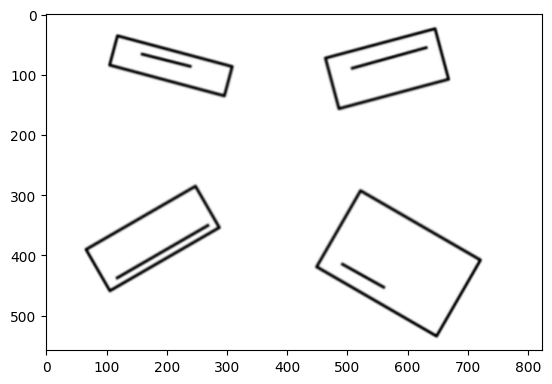

In [64]:
plt.imshow(mpimg.imread('image.png'))

In [82]:
# Step 1: Read the image
image = cv2.imread('image.png')
if image is None:
    print("Error: Image not found or cannot be read.")
else:
    print("Step 1: Image read successfully.")

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Step 2: Converted to grayscale.")

# Step 3: Edge detection
edges = cv2.Canny(gray, 50, 150)
print("Step 3: Edge detection completed.")

# Step 4: Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f"Step 4: Found {len(contours)} contours.")

# Step 5: Filter and approximate contours to find rectangles
rectangles = []
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:  # Check if the contour has 4 vertices
        rectangles.append(approx)
print(f"Step 5: Found {len(rectangles)} rectangles.")

# Step 6: Extract internal lines and measure their lengths
rect_info = []  # To store information about each rectangle and its internal line length

for i, rect in enumerate(rectangles):
    
    print(f"Processing rectangle {i + 1}/{len(rectangles)}")

    # Convert rect to a NumPy array of float32
    rect = np.array(rect, dtype='float32').reshape((4, 2))
    print(f"Rectangle {i + 1} points: {rect}")

    # Sort points in rect by their x-coordinates to reorder them
    rect = sorted(rect, key=lambda x: x[0])

    # Ensure points are in consistent order: top-left, top-right, bottom-right, bottom-left
    if rect[0][1] > rect[1][1]:
        rect[0], rect[1] = rect[1], rect[0]
    if rect[2][1] < rect[3][1]:
        rect[2], rect[3] = rect[3], rect[2]

    # Convert back to numpy array
    rect = np.array(rect, dtype='float32')

    # Extract the internal line from the grayscale image
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, [np.array(rect, dtype=np.int32)], -1, (255), thickness=cv2.FILLED)
    internal_line = cv2.bitwise_and(gray, gray, mask=mask)

    # Find the longest line within the masked region
    lines = cv2.HoughLinesP(internal_line, 1, np.pi / 180, threshold=100, minLineLength=30, maxLineGap=10)
    if lines is not None:
        longest_line_length = max(np.linalg.norm(line[0][:2] - line[0][2:]) for line in lines)
    else:
        longest_line_length = 0

    # Store rectangle info and the length of its internal line
    
    rect_info.append((rect, longest_line_length))
    print(f"Rectangle {i + 1}: Longest line length = {longest_line_length}")

print(f"Step 6: Processed {len(rect_info)} rectangles.")
for rect, length in rect_info:
    print(f"Rectangle: {rect}, Longest line length: {length}")

# Step 7: Sort rectangles by the length of the internal line
rect_info.sort(key=lambda x: x[1])
print("Step 7: Sorted rectangles by longest line length.")

# Replace longest line length with its rank
for rank, (rect, _) in enumerate(rect_info, start=1):
    rect_info[rank-1] = (rect, rank)
print("Step 7: Replaced longest line length with ranks.")

rect_info = rect_info[:4]
print("Step 7: Selected the top 4 rectangles.")

# Draw the rectangles and number them on the original image
for rect, rank in rect_info:
    # Draw the rectangle
    cv2.polylines(image, [np.array(rect, dtype=np.int32).reshape((-1, 1, 2))], True, (0, 255, 0), 2)
    
    # Calculate the bottom center of the rectangle
    bottom_center_x = int((rect[0][0] + rect[2][0]) / 2)
    bottom_center_y = int(max(rect[2][1], rect[3][1]) + 40)  # Position below the rectangle, adjusted for clarity

    # Draw a white rectangle behind the number for better visibility
    cv2.rectangle(image, (bottom_center_x - 15, bottom_center_y - 30), (bottom_center_x + 15, bottom_center_y), (255, 255, 255), thickness=cv2.FILLED)

    # Draw the rank number below the rectangle
    cv2.putText(image, str(rank), (bottom_center_x - 10, bottom_center_y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    print(rank)
# Save the final image with numbered rectangles
cv2.imwrite('output_num_image.png', image)

Step 1: Image read successfully.
Step 2: Converted to grayscale.
Step 3: Edge detection completed.
Step 4: Found 22 contours.
Step 5: Found 16 rectangles.
Processing rectangle 1/16
Rectangle 1 points: [[523. 298.]
 [717. 410.]
 [648. 530.]
 [454. 419.]]
Rectangle 1: Longest line length = 231.93102422918759
Processing rectangle 2/16
Rectangle 2 points: [[522. 298.]
 [454. 420.]
 [649. 530.]
 [716. 408.]]
Rectangle 2: Longest line length = 233.3452377915607
Processing rectangle 3/16
Rectangle 3 points: [[522. 291.]
 [723. 407.]
 [648. 537.]
 [447. 420.]]
Rectangle 3: Longest line length = 240.41630560342617
Processing rectangle 4/16
Rectangle 4 points: [[521. 291.]
 [447. 421.]
 [650. 536.]
 [723. 406.]]
Rectangle 4: Longest line length = 241.83051916579925
Processing rectangle 5/16
Rectangle 5 points: [[247. 290.]
 [282. 354.]
 [107. 455.]
 [ 70. 392.]]
Rectangle 5: Longest line length = 214.21951358361358
Processing rectangle 6/16
Rectangle 6 points: [[248. 290.]
 [ 70. 391.]
 [106. 45

True

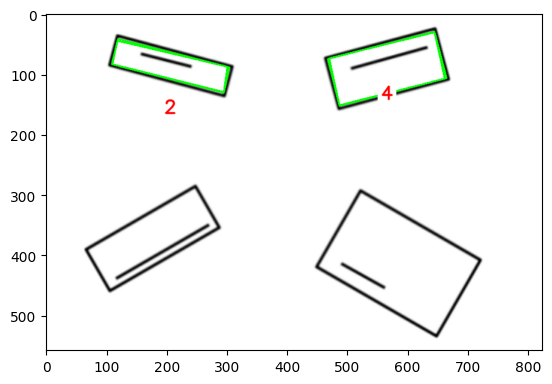

In [83]:
plt.imshow(mpimg.imread('output_num_image.png'))